In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {
    'longitude': [73, 55, 0.12, 13, 38, 32, 140, 74],
    'latitude': [17, 25, 51, 53, 56, 116, 36, 40.7],
    'city': ['Mumbai', 'Dubai', 'London', 'Berlin', 'Moscow', 'Perth', 'Tokyo', 'New York']
}
df=pd.DataFrame(data)
print(df)

   longitude  latitude      city
0      73.00      17.0    Mumbai
1      55.00      25.0     Dubai
2       0.12      51.0    London
3      13.00      53.0    Berlin
4      38.00      56.0    Moscow
5      32.00     116.0     Perth
6     140.00      36.0     Tokyo
7      74.00      40.7  New York


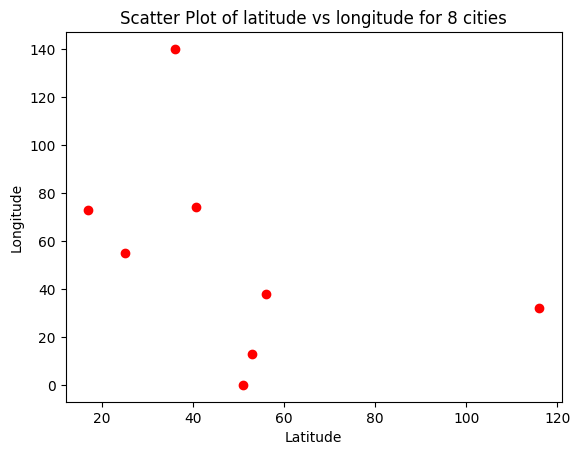

In [3]:
plt.scatter(df["latitude"], df["longitude"], c="red")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Scatter Plot of latitude vs longitude for 8 cities")
plt.show()

In [4]:
def euclidean(info):
  dist=[]
  for _, i in df.iterrows():
    d=((i.latitude-info.latitude)**2 +(i.longitude-info.longitude)**2)**0.5
    dist.append(round(d, 2))
  return dist

In [5]:
df_euclidean=df.copy(deep=True)
for _, i in df.iterrows():
  df_euclidean[f"Euclidean Distance from{i.city}"]=euclidean(i)

In [6]:
print(df_euclidean)

   longitude  latitude      city  Euclidean Distance fromMumbai  \
0      73.00      17.0    Mumbai                           0.00   
1      55.00      25.0     Dubai                          19.70   
2       0.12      51.0    London                          80.42   
3      13.00      53.0    Berlin                          69.97   
4      38.00      56.0    Moscow                          52.40   
5      32.00     116.0     Perth                         107.15   
6     140.00      36.0     Tokyo                          69.64   
7      74.00      40.7  New York                          23.72   

   Euclidean Distance fromDubai  Euclidean Distance fromLondon  \
0                         19.70                          80.42   
1                          0.00                          60.73   
2                         60.73                           0.00   
3                         50.48                          13.03   
4                         35.36                          38.21   


In [8]:
def manhattan(info):
  dist=[]
  for _, i in df.iterrows():
    d=(abs(i.latitude-info.latitude) + abs(i.longitude-info.longitude))
    dist.append(round(d, 2))
  return dist

In [9]:
df_manhattan=df.copy(deep=True)
for _, i in df.iterrows():
  df_manhattan[f"Manhattan Distance from {i.city}"]=manhattan(i)

In [10]:
print(df_manhattan)

   longitude  latitude      city  Manhattan Distance from Mumbai  \
0      73.00      17.0    Mumbai                            0.00   
1      55.00      25.0     Dubai                           26.00   
2       0.12      51.0    London                          106.88   
3      13.00      53.0    Berlin                           96.00   
4      38.00      56.0    Moscow                           74.00   
5      32.00     116.0     Perth                          140.00   
6     140.00      36.0     Tokyo                           86.00   
7      74.00      40.7  New York                           24.70   

   Manhattan Distance from Dubai  Manhattan Distance from London  \
0                          26.00                          106.88   
1                           0.00                           80.88   
2                          80.88                            0.00   
3                          70.00                           14.88   
4                          48.00               

In [11]:
def minkowski(info):
  p=3
  dist=[]
  for _, i in df.iterrows():
    d=(abs(i.latitude-info.latitude)**p + abs(i.longitude-info.longitude)**p)**(1/3)
    dist.append(round(d, 2))
  return dist

In [12]:
df_minkowski=df.copy(deep=True)
for _, i in df.iterrows():
  df_minkowski[f"Minkowski Distance from {i.city}"]=minkowski(i)

In [13]:
print(df_minkowski)

   longitude  latitude      city  Minkowski Distance from Mumbai  \
0      73.00      17.0    Mumbai                            0.00   
1      55.00      25.0     Dubai                           18.51   
2       0.12      51.0    London                           75.27   
3      13.00      53.0    Berlin                           64.04   
4      38.00      56.0    Moscow                           46.75   
5      32.00     116.0     Perth                          101.29   
6     140.00      36.0     Tokyo                           67.51   
7      74.00      40.7  New York                           23.70   

   Minkowski Distance from Dubai  Minkowski Distance from London  \
0                          18.51                           75.27   
1                           0.00                           56.76   
2                          56.76                            0.00   
3                          45.79                           12.90   
4                          32.62               

In [14]:
import numpy as np
def mahalanobis_distance(x, mean, covariance):
  d = x - mean
  inv_covariance = np.linalg.inv(covariance)
  distance = np.sqrt(np.dot(np.dot(d.T, inv_covariance), d))
  return distance

In [15]:
point = np.array([1.5, 2.0])
mean = np.array([1.0, 1.5])
covariance = np.array([[1.0, 0.5], [0.5, 1.0]])
distance = mahalanobis_distance(point, mean, covariance)
print("Mahalanobis Distance: ", distance)

Mahalanobis Distance:  0.5773502691896257


In [16]:
import numpy as np
import math
P = np.array([0.3, 0.4, 0.2, 0.1])
Q = np.array([0.2, 0.3, 0.3, 0.2])

In [17]:
def bhattacharyya_distance(p, q):
  bc = np.sum(np.sqrt(p * q))
  b_distance = -math.log(bc)
  return b_distance

In [18]:
b_distance = bhattacharyya_distance(P, Q)
print("Bhattacharyya Distance:", b_distance)

Bhattacharyya Distance: 0.022522266530759078
